# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

Pada tahap ini, Anda perlu diimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

# Dataset Loading

Tahap selanjutnya adalah memuat dataset ke dalam notebook. Adapun dataset yang akan digunakan pada proyek kali ini adalah dataset hasil panen pertanian. Dataset diambil dari sumber yang sudah ada pada Kaggle. Pertama, mari kita mendownload dataset langsung dari Kaggle.

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d govindaramsriram/crop-yield-of-a-farm

Dataset URL: https://www.kaggle.com/datasets/govindaramsriram/crop-yield-of-a-farm
License(s): CC0-1.0


File yang didownload ternyata berbentuk file zip sehingga kita perlu melakukan ekstraksi file terlebih dahulu.

In [3]:
!unzip /content/crop-yield-of-a-farm.zip

Archive:  /content/crop-yield-of-a-farm.zip
  inflating: crop_yield_data.csv     


Kemudian kita muat file dataset berformat csv ke dalam dataframe pandas untuk pemrosesan yang lebih mudah.

In [4]:
df = pd.read_csv('/content/crop_yield_data.csv')
df

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
...,...,...,...,...,...,...
2995,1483,9,78,12,2739,155
2996,804,9,481,4,1898,319
2997,870,1,113,7,2282,129
2998,1352,6,767,11,2901,493


# Exploratory Data Analysis (EDA)

Di tahap ini, akan dilakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. Memahami Struktur Data
  - Tinjau jumlah baris dan kolom dalam dataset.
  - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
2. Menangani Data yang Hilang
  - Identifikasi dan analisis data yang hilang (missing values). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.
3. Analisis Distribusi dan Korelasi
  - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
  - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.
4. Visualisasi Data
  - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
  - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.
  
Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Analisis Deskriptif

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


Dataset memiliki baris data sebanyak 3000 dan 6 kolom fitur. Dari hasil output df.info(), kita dapat melihat detail dari setiap atribut/kolom sebagai berikut:
1. rainfall_mm: Jumlah rata-rata curah hujan (dalam milimeter) selama musim tanam. (Kisaran: 500 mm hingga 2000 mm)
2. soil_quality_index: Peringkat numerik kualitas tanah, dengan skala dari 1 (buruk) hingga 10 (sangat baik). (Rentang: 1 hingga 10)
3. farm_size_hectares: Ukuran kebun dalam hektar. (Kisaran: 10 hingga 1000 hektar)
4. sunlight_hours: Rata-rata jam sinar matahari harian selama musim tanam. (Kisaran: 4 hingga 12 jam per hari)
5. fertilizer_kg: Jumlah pupuk yang digunakan per hektar (dalam kilogram). (Kisaran: 100 hingga 3000 kg/hektar)
6. crop_yield: variabel target yang merepresentasikan prediksi hasil panen dalam ton per hektar, dihitung menggunakan persamaan linier berdasarkan fitur-fitur di atas.

In [7]:
df.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


Berdasarkan hasil statistik deskriptif yang ditampilkan, terdapat beberapa informasi penting yang dapat diambil mengenai kolom-kolom dalam dataset:
1. Rainfall (mm):
  - Sebaran curah hujan terlihat cukup merata di sepanjang rentang nilai dari sekitar 500 mm hingga 2000 mm dengan rata-rata 1263,09 mm.
  - Sebagian besar curah hujan berada dalam rentang 896 mm hingga 1636 mm (kuartil ke-1 hingga kuartil ke-3).
2. Soil Quality Index:
  - Indeks kualitas tanah menunjukkan sebaran kategori dari angka 1 hingga 10.
  - Sebagian besar besar indeks kualitas tanah berkisar antara 3 hingga 8.
3. Farm Size (hectares):
  - Ukuran lahan pertanian juga bervariasi dari sekitar 10 hingga 1000 hektar dengan rata-rata 498.80 hektar.
  - Sebagian besar ukuran lahan pertanian berada pada rentang 242 hingga 741 hektar.
4. Sunlight Hours:
  - Jumlah jam sinar matahari bervariasi dari 4 hingga 12 jam dengan rata-rata 7,99 jam.
  - Sebagian besar papan sinar matahari berada pada rentang 6 hingga 10 jam.
5. Fertilizer (kg):
  - Jumlah pupuk yang digunakan memiliki sebaran dari 100 hingga 3000 kg dengan rata-rata 1549.45 kg.
  - Sebagian besar jumlah pupuk yang digunakan berada pada rentang 869,75 hingga 2225 kg.
6. Crop Yield:
  - Hasil panen (crop yield) menunjukkan sebaran yang cenderung unimodal (memiliki satu puncak utama) di sekitar nilai 46 hingga 628 ton dengan rata-rata 328,1 ton.
  - Sebagian besar data hasil panen terkonsentrasi di rentang antara sekitar 199 hingga 455 ton.

In [ ]:
df.isna().sum()

,0
rainfall_mm,0
soil_quality_index,0
farm_size_hectares,0
sunlight_hours,0
fertilizer_kg,0
crop_yield,0


Dataset tidak memiliki missing value pada berbagai fitur.

In [ ]:
df.duplicated().sum()

np.int64(0)

Dataset juga tidak memiliki data yang duplikat. Oleh karena itu, yang perlu yang perlu dilakukan pada tahap cleaning adalah feature scaling untuk menyamakan rentang antar variabel selain target.

## Univariate Analysis

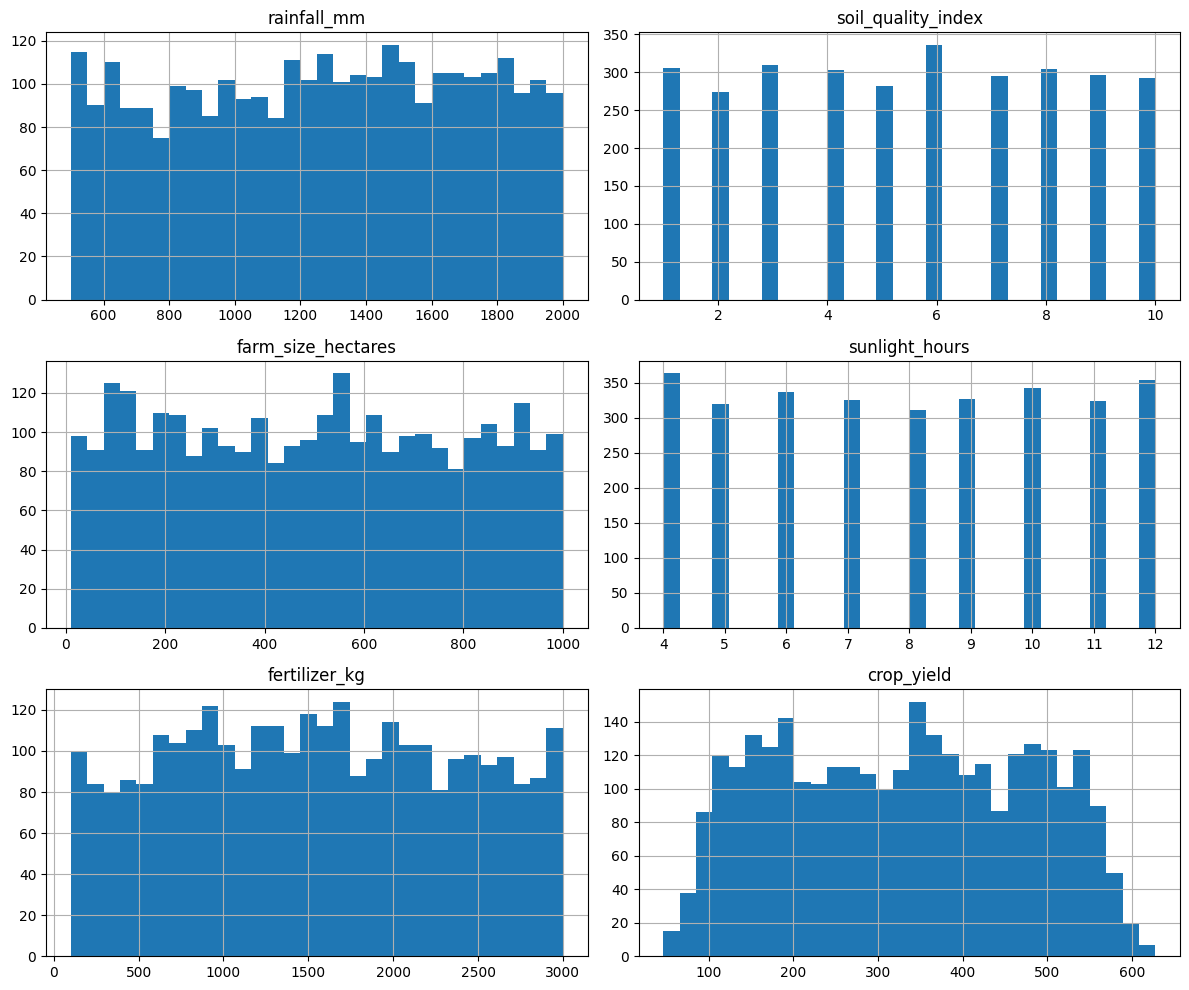

In [ ]:
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

Berdasarkan histogram dari berbagai fitur dan target variabel, berikut adalah deskripsi mengenai sebaran datanya:
1. Rainfall (mm):
  - Sebaran curah hujan terlihat cukup merata di sepanjang rentang nilai dari sekitar 500 mm hingga 2000 mm.
  - Tidak terlihat adanya puncak (mode) yang sangat dominan, melainkan frekuensi yang relatif serupa di berbagai interval curah hujan.
2. Soil Quality Index:
  - Indeks kualitas tanah menunjukkan sebaran yang diskrit dan terkumpul pada nilai-nilai integer dari 1 hingga 10.
  - Terlihat adanya frekuensi yang bervariasi antar indeks kualitas tanah. Beberapa nilai seperti 2, 5, dan 8 memiliki frekuensi yang lebih tinggi dibandingkan nilai lainnya.
3. Farm Size (hectares):
  - Ukuran lahan pertanian juga menunjukkan sebaran yang relatif merata dari sekitar 10 hingga 1000 hektar.
  - Mirip dengan curah hujan, tidak ada satu ukuran lahan yang secara signifikan lebih dominan dibandingkan yang lain.
4. Sunlight Hours:
  - Jumlah jam sinar matahari menunjukkan sebaran yang diskrit dan terbatas pada nilai-nilai integer dari 4 hingga 12, yang kemungkinan merepresentasikan bulan dalam setahun atau kategori durasi sinar matahari.
  - Terdapat variasi frekuensi antar jumlah jam sinar matahari, dengan beberapa nilai seperti 6 dan 9 memiliki frekuensi yang lebih tinggi.
5. Fertilizer (kg):
  - Jumlah pupuk yang digunakan memiliki sebaran yang cukup luas dari 100 hingga 3000 kg.
  - Terlihat adanya beberapa puncak frekuensi di sekitar nilai 500, 1500, dan 2500 kg, namun secara keseluruhan sebarannya cukup bervariasi.
6. Crop Yield:
  - Hasil panen (crop yield) menunjukkan sebaran yang cenderung unimodal (memiliki satu puncak utama) di sekitar nilai 300 hingga 400.
  - Sebagian besar data hasil panen terkonsentrasi di rentang antara sekitar 100 hingga 600.

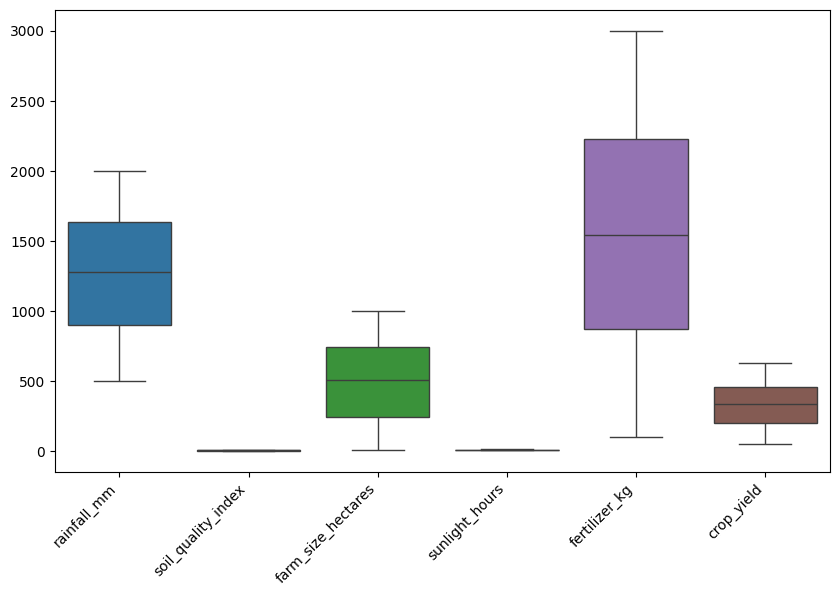

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.show()


Dataset memiliki distribusi yang cukup simetris sehingga tidak mengandung outlier.

## Bivariate Analysis

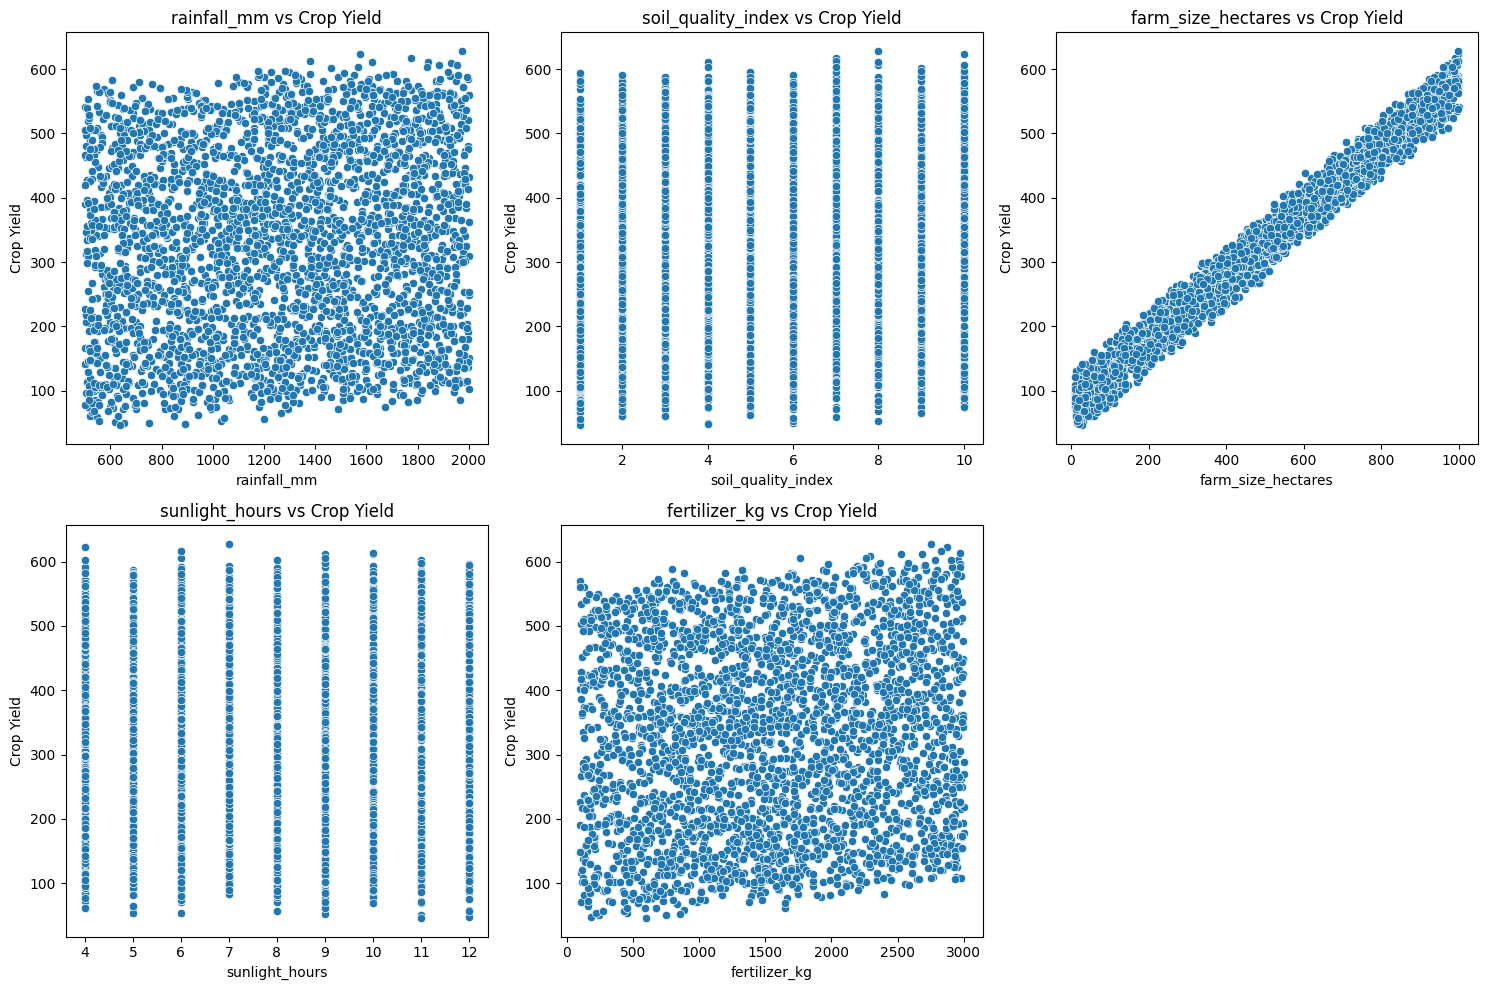

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['rainfall_mm', 'soil_quality_index', 'farm_size_hectares', 'sunlight_hours', 'fertilizer_kg']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 baris, 3 kolom
axs = axs.flatten()  # Biar gampang dipanggil

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['crop_yield'], ax=axs[i])
    axs[i].set_title(f'{feature} vs Crop Yield')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Crop Yield')

# Kosongkan sisa subplot kalau jumlah fitur ganjil
if len(features) < len(axs):
    for j in range(len(features), len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


Scatter plot di atas memvisualisasikan korelasi antara berbagai fitur dan hasil panen.
- Curah Hujan (Rainfall): Sebaran titik-titik terlihat acak, mengindikasikan korelasi linear yang lemah dengan hasil panen.
- Kualitas Tanah (Soil Quality) dan Jam Sinar Matahari (Sunlight Hours): Kedua fitur ini menunjukkan sebaran data per kategori yang cenderung acak terhadap hasil panen.
- Pupuk (Fertilizer): Terdapat tren positif yang menunjukkan bahwa hasil panen cenderung meningkat seiring dengan peningkatan penggunaan pupuk, meskipun hubungannya tampak tidak sepenuhnya linear.
- Ukuran Lahan (Farm Size): Menunjukkan tren positif yang mendekati linear, mengindikasikan bahwa hasil panen cenderung meningkat seiring dengan bertambahnya ukuran lahan.

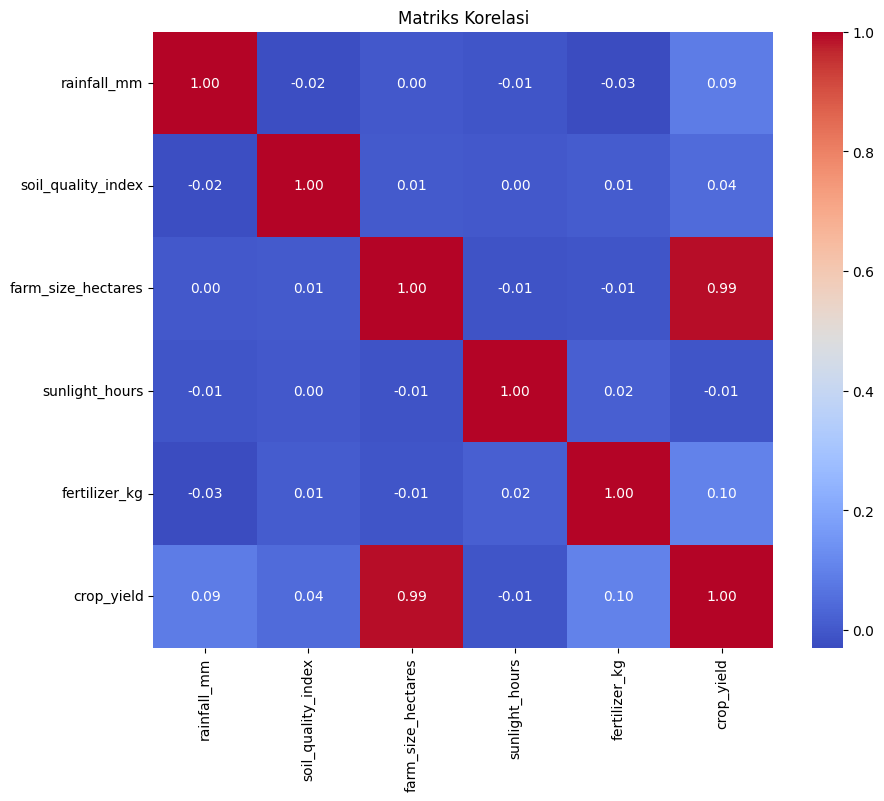

In [ ]:
# Heatmap korelasi semua variabel
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
# Korelasi fitur dengan crop_yield
correlations = df.corr()['crop_yield'].sort_values(ascending=False)
print("\nKorelasi fitur terhadap crop_yield:")
print(correlations)


Korelasi fitur terhadap crop_yield:
crop_yield            1.000000
farm_size_hectares    0.989201
fertilizer_kg         0.102023
rainfall_mm           0.086339
soil_quality_index    0.043990
sunlight_hours       -0.006792
Name: crop_yield, dtype: float64


Matriks korelasi menunjukkan farm_size_hectares memiliki korelasi positif yang paling tinggi dengan crop_yield yaitu 0,98. Sedangkan fitur lainnya memiliki korelasi yang sangat lemah.

# Data Preprocessing

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Sebelum melangkah lebih jauh, penting untuk dicatat bahwa dataset yang kita gunakan saat ini tergolong cukup bersih. Berdasarkan analisis awal, kita tidak menemukan adanya:
- Missing Value: Tidak ada nilai yang hilang dalam dataset.
- Data Duplikat: Tidak ada baris data yang identik.
- Outlier Signifikan: Tidak terdapat nilai-nilai ekstrem yang perlu penanganan khusus.
- Fitur Kategorikal: Semua fitur dalam dataset bersifat numerik, sehingga tidak memerlukan encoding.

Dengan demikian, tahapan preprocessing yang akan kita lakukan adalah pembagian dataset dan normalisasi fitur.

1. Pembagian Dataset (Train Test Split)

Langkah pertama adalah mendefinisikan mana yang menjadi fitur (variabel independen) dan mana yang menjadi target (variabel dependen yang ingin kita prediksi). Dalam kasus ini, kolom 'crop_yield' adalah target kita.

In [ ]:
X = df.drop(columns=['crop_yield'])
y = df['crop_yield']

Untuk mengevaluasi performa model secara objektif, kita perlu membagi dataset menjadi dua bagian: set pelatihan (training set) yang digunakan untuk melatih model, dan set pengujian (testing set) yang digunakan untuk menguji performa model pada data yang belum pernah dilihat sebelumnya.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Total seluruh sampel pada dataset: {len(X)}')
print(f'Total sampel train dataset: {len(X_train)}')
print(f'Total sampel in test dataset: {len(X_test)}')

Total seluruh sampel pada dataset: 3000
Total sampel train dataset: 2400
Total sampel in test dataset: 600


2. Normalisasi Fitur Menggunakan StandardScaler

Fitur-fitur dalam dataset mungkin memiliki skala yang berbeda. Algoritma machine learning tertentu dapat bekerja lebih baik jika fitur-fitur dinormalisasi ke skala yang serupa. Kita akan menggunakan StandardScaler untuk melakukan standardisasi, yaitu menghilangkan rata-rata dan menskalakan ke varians unit.


In [ ]:
# Buat scaler
scaler = StandardScaler()

# Fit di X_train lalu transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test pakai scaler yang sama
X_test_scaled = scaler.transform(X_test)

# Model Development

Tahap terakhir adalah melatih dan mengevaluasi performa dari lima algoritma regresi yang berbeda pada data kita yang telah dibagi menjadi set pelatihan dan pengujian. Kita akan menggunakan Pipeline dari scikit-learn untuk menyederhanakan proses ini, meskipun dalam kasus ini kita tidak menyertakan scaler dalam pipeline (ini mungkin menjadi pertimbangan untuk eksperimen selanjutnya).

Kita mendefinisikan sebuah dictionary bernama pipelines yang berisi nama-nama model regresi sebagai keys dan objek Pipeline sebagai values. Setiap Pipeline saat ini hanya terdiri dari satu langkah, yaitu model regresi itu sendiri.

Selanjutnya, kita akan melakukan iterasi melalui setiap model dalam dictionary pipelines, melatihnya menggunakan data pelatihan (X_train, y_train), membuat prediksi pada data pelatihan dan pengujian (X_test, y_test), dan mengevaluasi performanya menggunakan metrik Mean Squared Error (MSE) dan R-squared (R2).

In [ ]:
# Definisikan 5 pipeline model tanpa scaler
pipelines = {
    'Linear Regression': Pipeline([
        ('model', LinearRegression())
    ]),
    'Decision Tree': Pipeline([
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('model', XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
    ]),
    'Lasso Regression': Pipeline([
        ('model', Lasso(alpha=1.0, random_state=42))
    ]),
    'Ridge Regression': Pipeline([
        ('model', Ridge(alpha=1.0, random_state=42))
    ])
}

# Train dan evaluasi semua model
results = {}

for name, pipeline in pipelines.items():
    # Train
    pipeline.fit(X_train, y_train)

    # Predict Train
    y_train_pred = pipeline.predict(X_train)

    # Predict Test
    y_test_pred = pipeline.predict(X_test)

    # Evaluate
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[name] = {
        'Train MSE': train_mse,
        'Train R2': train_r2,
        'Test MSE': test_mse,
        'Test R2': test_r2
    }

# Tampilkan hasil
results_df = pd.DataFrame(results).T
print(results_df)

                   Train MSE  Train R2    Test MSE   Test R2
Linear Regression   0.085804  0.999996    0.081761  0.999996
Decision Tree       0.000000  1.000000  137.530000  0.993578
XGBoost             1.182992  0.999943   23.437340  0.998906
Lasso Regression    0.269812  0.999987    0.261464  0.999988
Ridge Regression    0.085804  0.999996    0.081751  0.999996


Berdasarkan hasil evaluasi menggunakan MSE dan R2, berikut adalah interpretasi yang dapat diambil.
- Linear Regression dan Ridge Regression menunjukkan performa yang sangat baik dan serupa pada kedua set data, dengan MSE yang sangat rendah (mendekati 0) dan R2 yang sangat tinggi (mendekati 1). Ini mengindikasikan bahwa model-model ini sangat baik dalam memprediksi target dan tidak menunjukkan tanda-tanda overfitting. Regularisasi L2 pada Ridge Regression tampaknya tidak memberikan perbedaan signifikan dibandingkan Linear Regression pada dataset ini.

- Decision Tree mencapai performa sempurna pada data pelatihan (MSE 0, R2 1), namun performanya menurun drastis pada data pengujian (MSE tinggi, R2 jauh lebih rendah). Ini adalah indikasi kuat terjadinya overfitting, di mana model terlalu kompleks dan mempelajari noise dalam data pelatihan sehingga gagal melakukan generalisasi dengan baik pada data baru.

- XGBoost menunjukkan performa yang sangat baik pada kedua set data, dengan MSE yang rendah dan R2 yang tinggi. Meskipun tidak sesempurna Decision Tree pada data pelatihan, performanya jauh lebih baik dan lebih stabil pada data pengujian, menunjukkan kemampuan generalisasi yang baik.

- Lasso Regression juga menunjukkan performa yang sangat baik dan stabil antara data pelatihan dan pengujian, dengan MSE yang rendah dan R2 yang sangat tinggi, meskipun sedikit lebih buruk dibandingkan Linear Regression dan Ridge Regression. Regularisasi L1 pada Lasso mungkin melakukan sedikit seleksi fitur, namun dampaknya tidak terlalu besar pada performa keseluruhan dalam kasus ini.

Secara keseluruhan, Linear Regression, Ridge Regression, dan XGBoost menunjukkan performa yang baik dalam melakukan prediksi pada data yang belum dilihat. Decision Tree mengalami overfitting yang signifikan, sedangkan Lasso Regression juga bekerja dengan baik namun sedikit di bawah performa dua model linear pertama.

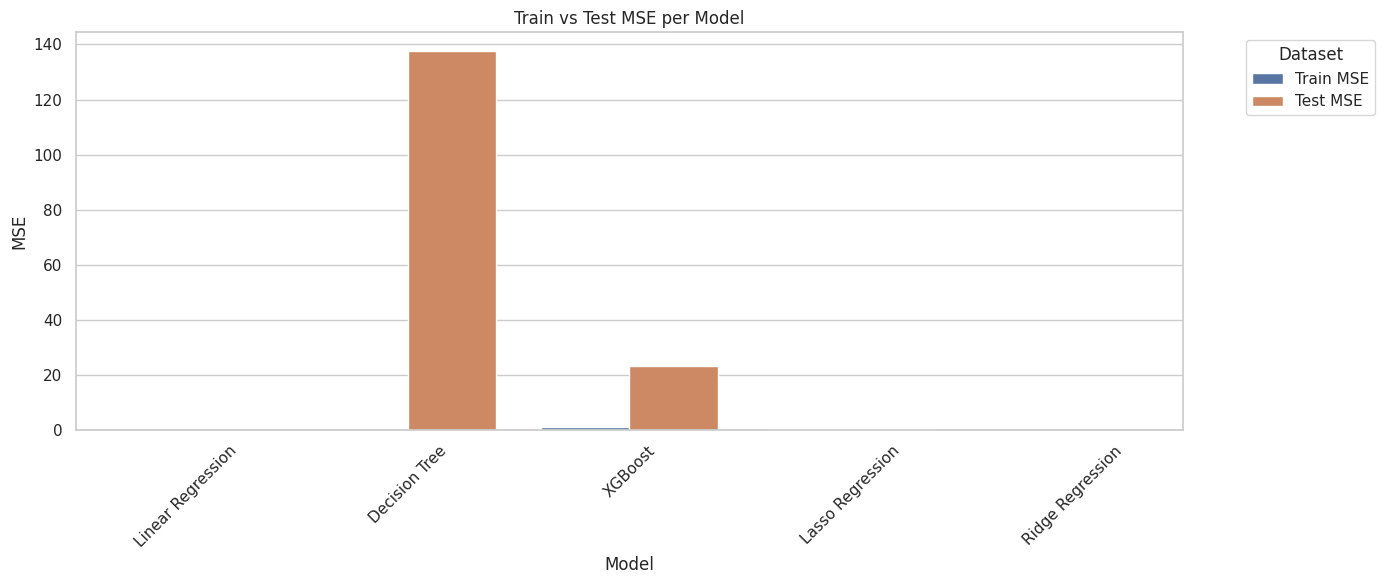

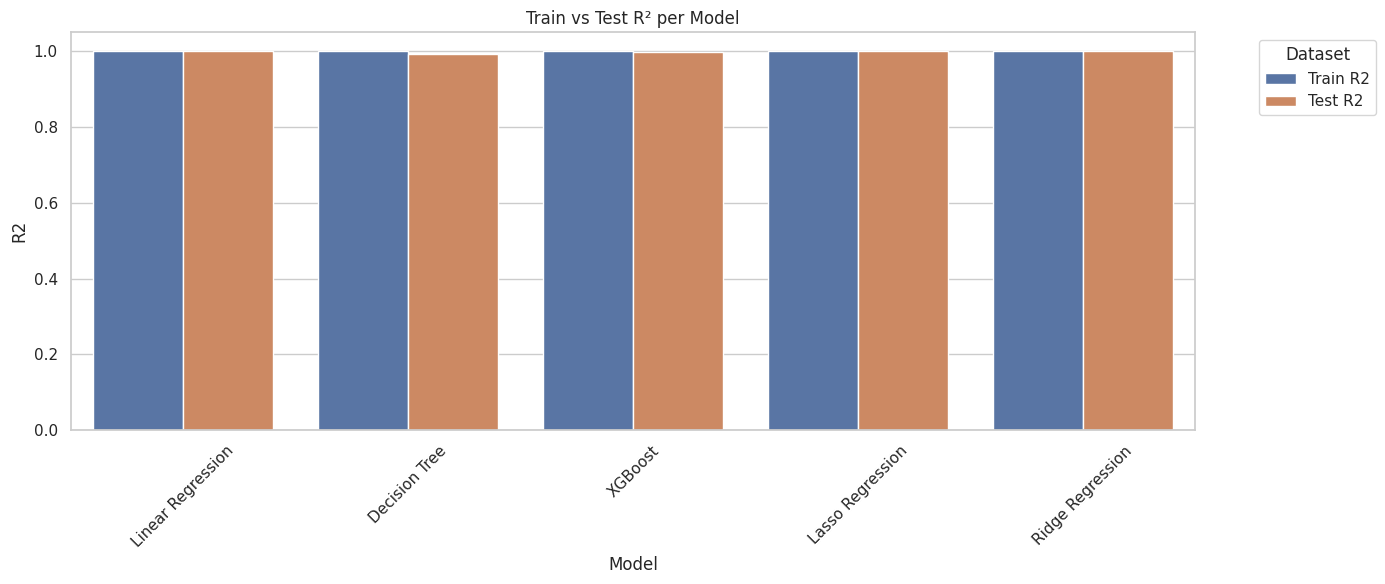

In [ ]:
# Reset index
results_df_reset = results_df.reset_index().rename(columns={'index': 'Model'})

# Pisahkan dataframe untuk MSE dan R2
mse_df = results_df_reset[['Model', 'Train MSE', 'Test MSE']]
r2_df = results_df_reset[['Model', 'Train R2', 'Test R2']]

# Melt masing-masing
mse_melted = mse_df.melt(id_vars='Model', var_name='Dataset', value_name='MSE')
r2_melted = r2_df.melt(id_vars='Model', var_name='Dataset', value_name='R2')

# Plot MSE
plt.figure(figsize=(14, 6))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=mse_melted)
plt.title('Train vs Test MSE per Model')
plt.xticks(rotation=45)
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(14, 6))
sns.barplot(x='Model', y='R2', hue='Dataset', data=r2_melted)
plt.title('Train vs Test R² per Model')
plt.xticks(rotation=45)
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
